In [9]:
from google.colab import drive

# Google Driveをマウント
drive.mount('/content/drive')

# マウント完了後のメッセージ
print("Google Driveがマウントされました！")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Driveがマウントされました！


# 目的変数の分布確認

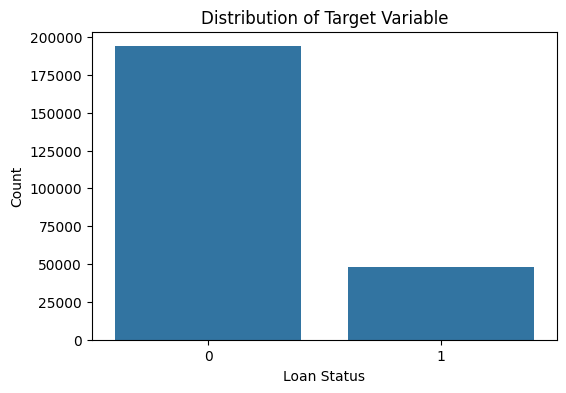

目的変数の割合:
loan_status
0    0.800372
1    0.199628
Name: proportion, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# CSVファイルを読み込む
file_path = '/content/drive/My Drive/signate/train_with_features.csv'
train = pd.read_csv(file_path, low_memory=False)

# 目的変数の分布
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=train)
plt.title('Distribution of Target Variable')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# 比率も確認
print("目的変数の割合:")
print(train['loan_status'].value_counts(normalize=True))


In [14]:
train.head()

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status,monthly_interest_rate,term_months,monthly_payment,total_payment,burden_index
0,1800.0,3.0,14.49,C4,NaN,debt_consolidation,665.0,Individual,0,0.012075,36.0,61.948981,2230.163322,3.353629
1,1200.0,5.0,16.29,C4,2.0,debt_consolidation,700.0,Individual,1,0.013575,60.0,29.366894,1762.013668,2.517162
2,2000.0,5.0,21.98,E4,10.0,home_improvement,670.0,Individual,0,0.018317,60.0,55.215084,3312.905027,4.944634
3,1000.0,3.0,8.59,A5,4.0,debt_consolidation,710.0,Individual,0,0.007158,36.0,31.609257,1137.933255,1.602723
4,1500.0,3.0,13.99,C1,4.0,debt_consolidation,680.0,Individual,0,0.011658,36.0,51.259160,1845.329745,2.713720


# ユニークな値を確認する

In [16]:
# 列のユニークな値
print("Unique values in 'employment_length':", train['employment_length'].unique())

# 列のユニークな値の総数
unique_count = train['employment_length'].nunique(dropna=False)

print(f"Total unique values in 'employment_length': {unique_count}")

Unique values in 'employment_length': [nan  2. 10.  4.  3.  7.  5.  8.  6.  0.  9.]
Total unique values in 'employment_length': 11


# 箱ひげ図を確認する

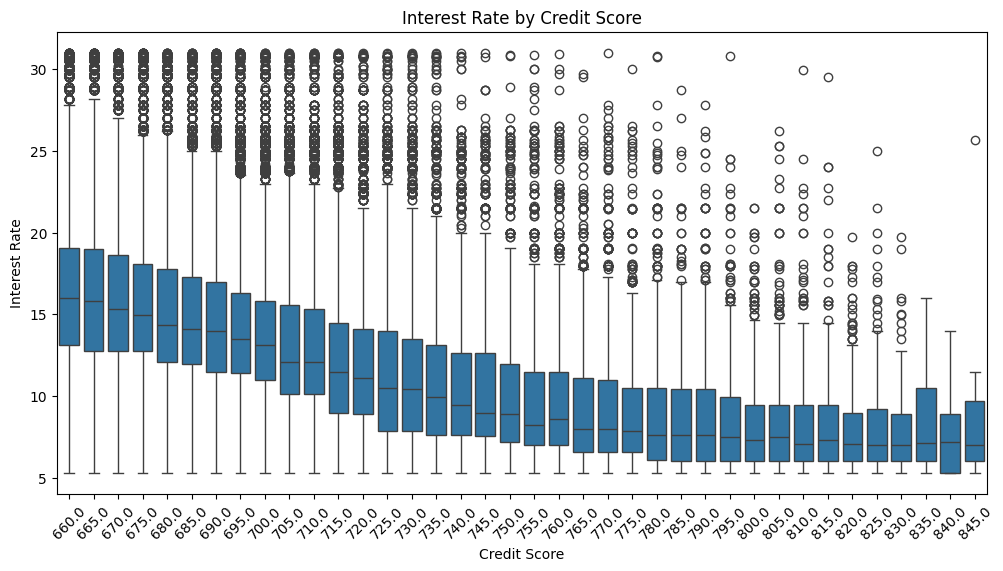

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# credit_scoreとinterest_rateの箱ひげ図
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='credit_score', y='interest_rate')
plt.title('Interest Rate by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()


# 特徴量ごとの分布を確認する

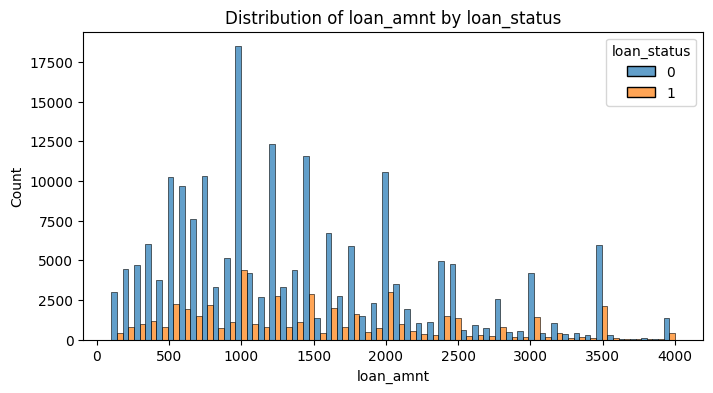

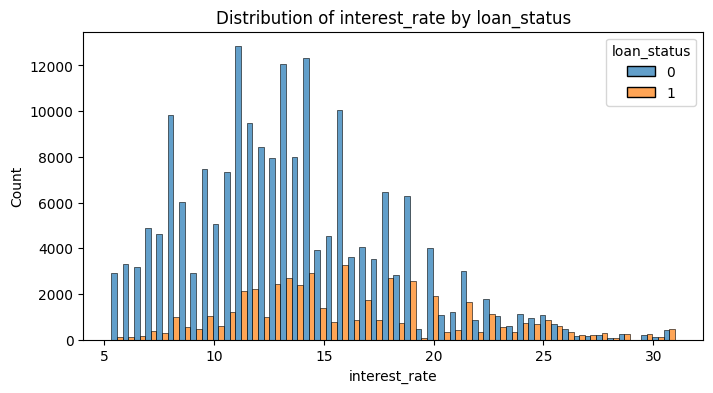

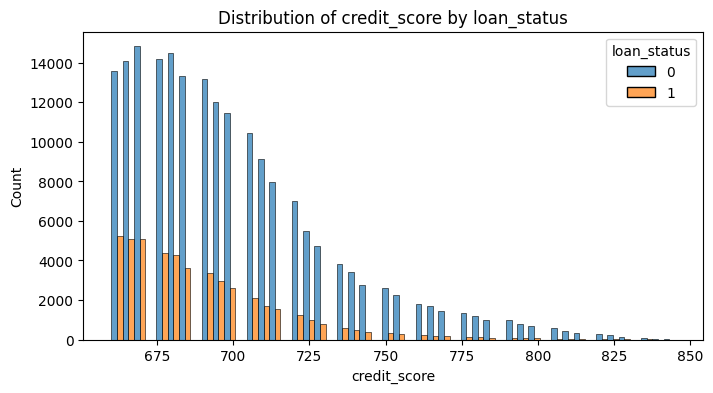

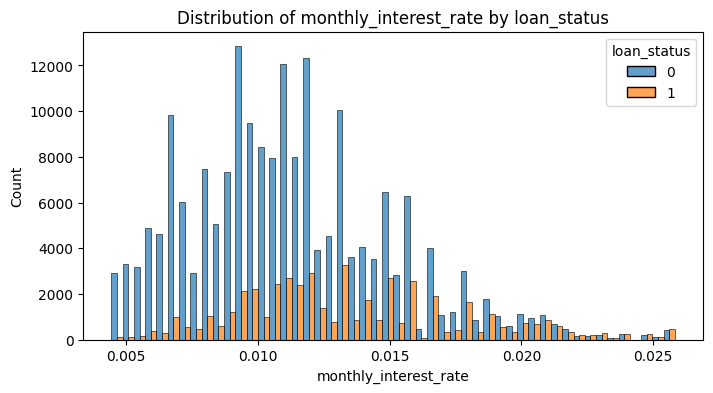

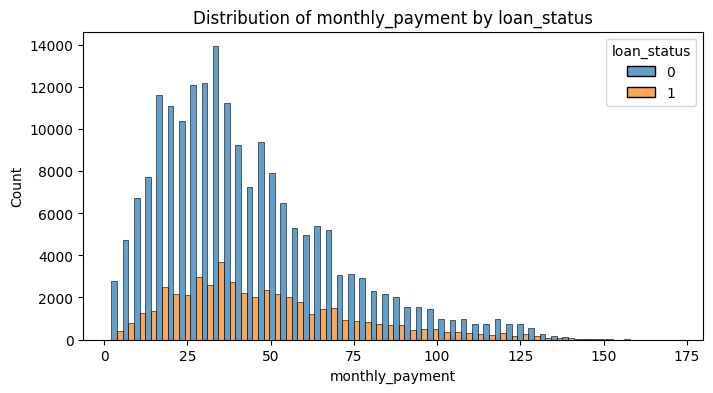

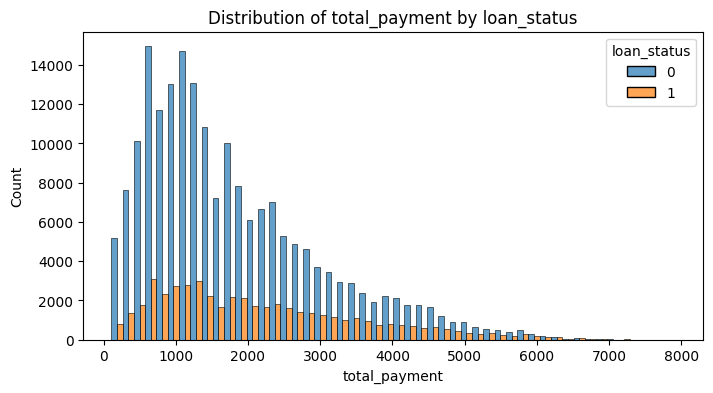

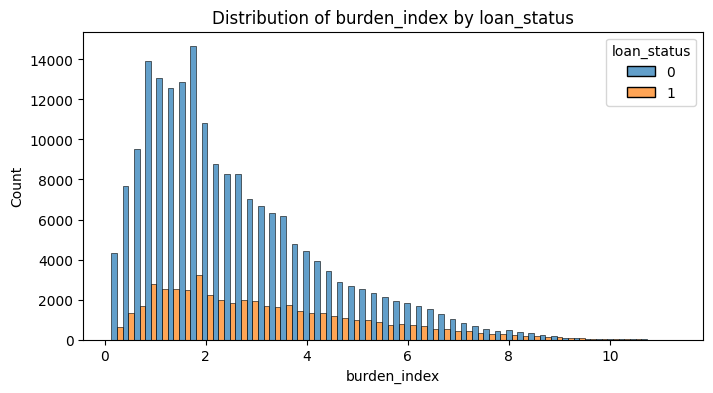

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数値特徴量の分布を確認
numeric_cols = ['loan_amnt', 'interest_rate', 'credit_score', 'monthly_interest_rate',
                'monthly_payment', 'total_payment', 'burden_index']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train, x=col, hue='loan_status', kde=False, bins=50, multiple='dodge', alpha=0.7)
    plt.title(f'Distribution of {col} by loan_status')
    plt.show()



# 相関行列とヒートマップを確認する

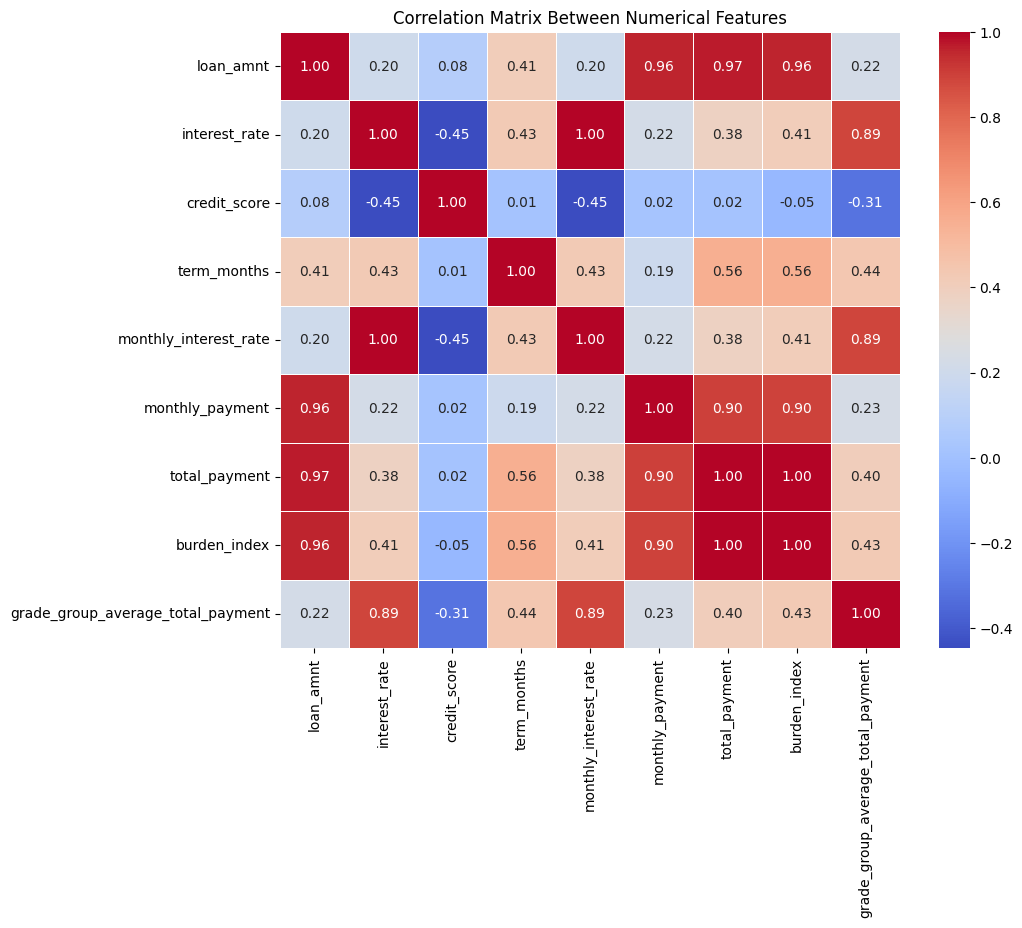

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 数値特徴量のリスト
numerical_features = ['loan_amnt', 'interest_rate', 'credit_score', 'term_months',
                      'monthly_interest_rate', 'monthly_payment', 'total_payment', 'burden_index', 'grade_group_average_total_payment']

# 数値変数の相関行列
correlation_matrix = train[numerical_features].corr()

# 相関行列をヒートマップで可視化
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Between Numerical Features")
plt.show()



# 数値変数間の関係を直感的に確認

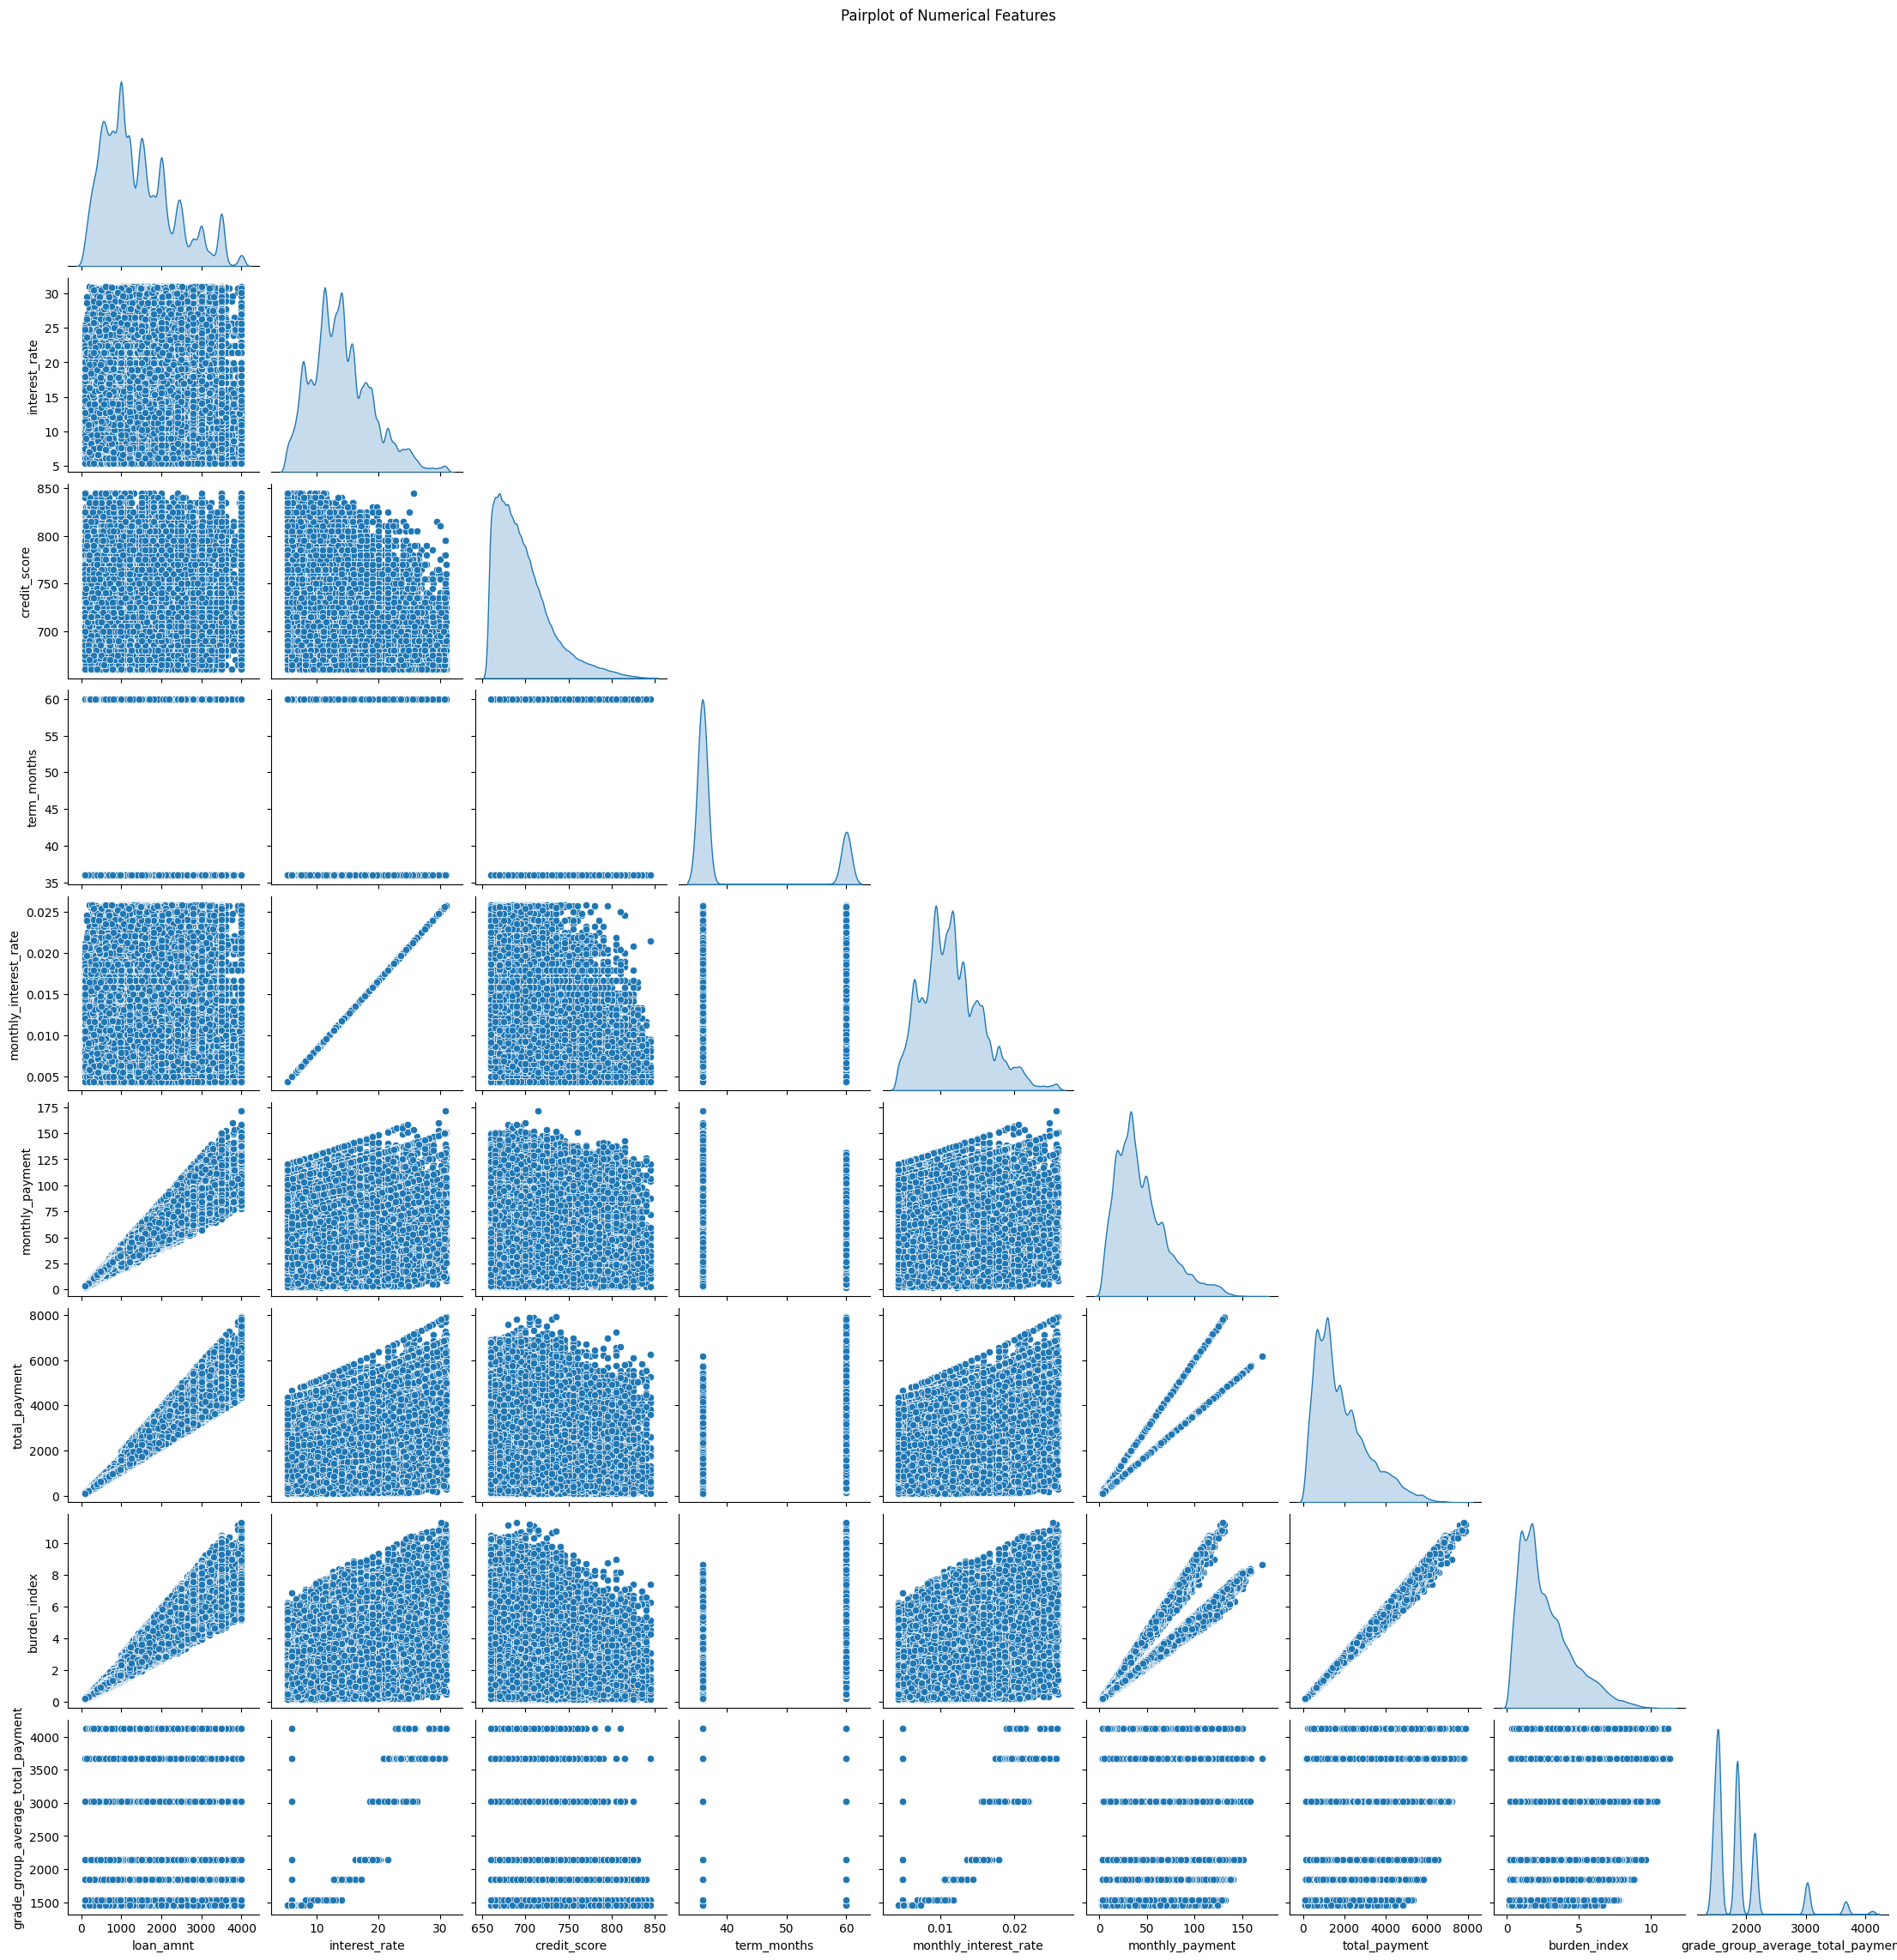

In [4]:
# 数値変数同士のペアプロット
sns.pairplot(train[numerical_features], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


# 目的変数を色分けして分布の詳細を確認する

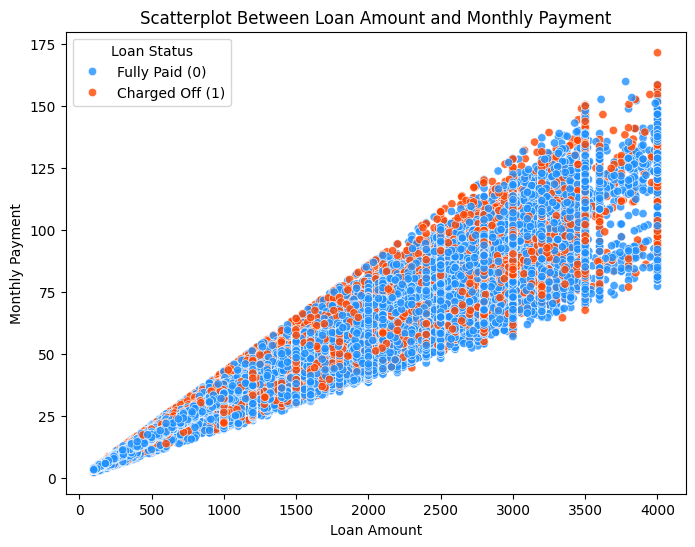

In [ ]:
# 数値変数同士の散布図 + 目的変数の色分け
plt.figure(figsize=(8, 6))

# 明示的に色を指定してプロット
sns.scatterplot(
    data=train,
    x='loan_amnt',
    y='monthly_payment',
    hue='loan_status',
    palette={0: 'dodgerblue', 1: 'orangered'},  # 完済=青, 不履行=赤
    alpha=0.8
)

# 凡例のタイトルとラベルをカスタマイズ
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Fully Paid (0)", "Charged Off (1)"], title="Loan Status")

# タイトルと軸ラベル
plt.title("Scatterplot Between Loan Amount and Monthly Payment")
plt.xlabel("Loan Amount")
plt.ylabel("Monthly Payment")

plt.show()


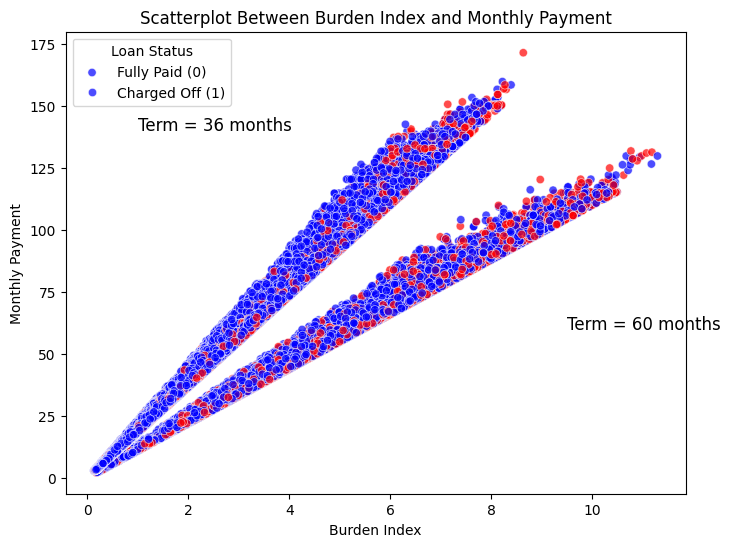

In [ ]:
plt.figure(figsize=(8, 6))

# loan_status で色分け
sns.scatterplot(
    data=train,
    x='burden_index',
    y='monthly_payment',
    hue='loan_status',
    palette={0: 'blue', 1: 'red'},  # 完済=青、不履行=赤
    alpha=0.7
)

# テキストラベルを左側に配置して重なりを避ける
plt.text(1, 140, 'Term = 36 months', fontsize=12, color='black')  # 左側に配置
plt.text(9.5, 60, 'Term = 60 months', fontsize=12, color='black')   # 右下に表示

# タイトルと軸ラベル
plt.title("Scatterplot Between Burden Index and Monthly Payment")
plt.xlabel("Burden Index")
plt.ylabel("Monthly Payment")

# 凡例のカスタマイズ
plt.legend(title='Loan Status', labels=['Fully Paid (0)', 'Charged Off (1)'])
plt.show()
